In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from a local CSV file
data = pd.read_csv('IMDB.csv')

In [3]:
# Convert labels to numeric format
label_map = {'positive': 1, 'negative': 0}
data['sentiment'] = data['sentiment'].map(label_map)

In [4]:
# Extract the text content and labels
reviews = data['review'].values
labels = data['sentiment'].values

In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)

In [6]:
# Tokenize the text and convert to sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [7]:
# Pad the sequences to a fixed length
max_len = 200  # Limit the length of each review to 200 words
X_train_padded = pad_sequences(X_train_seq, maxlen=max_len)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len)

In [8]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 128, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [9]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Train the model
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=128, validation_data=(X_test_padded, y_test))

Epoch 1/10
313/313 [==============================] - 16s 45ms/step - loss: 0.4462 - accuracy: 0.7974 - val_loss: 0.2800 - val_accuracy: 0.8842
Epoch 2/10
313/313 [==============================] - 14s 43ms/step - loss: 0.2416 - accuracy: 0.9043 - val_loss: 0.2619 - val_accuracy: 0.8921
Epoch 3/10
313/313 [==============================] - 14s 45ms/step - loss: 0.2018 - accuracy: 0.9216 - val_loss: 0.2693 - val_accuracy: 0.8898
Epoch 4/10
313/313 [==============================] - 14s 44ms/step - loss: 0.1798 - accuracy: 0.9309 - val_loss: 0.2851 - val_accuracy: 0.8853
Epoch 5/10
313/313 [==============================] - 14s 44ms/step - loss: 0.1647 - accuracy: 0.9383 - val_loss: 0.3040 - val_accuracy: 0.8792
Epoch 6/10
313/313 [==============================] - 14s 44ms/step - loss: 0.1517 - accuracy: 0.9439 - val_loss: 0.3231 - val_accuracy: 0.8767
Epoch 7/10
313/313 [==============================] - 14s 44ms/step - loss: 0.1405 - accuracy: 0.9488 - val_loss: 0.3440 - val_accuracy:

In [11]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.4036 - accuracy: 0.8669
Test Loss: 0.40362346172332764
Test Accuracy: 0.8669000267982483


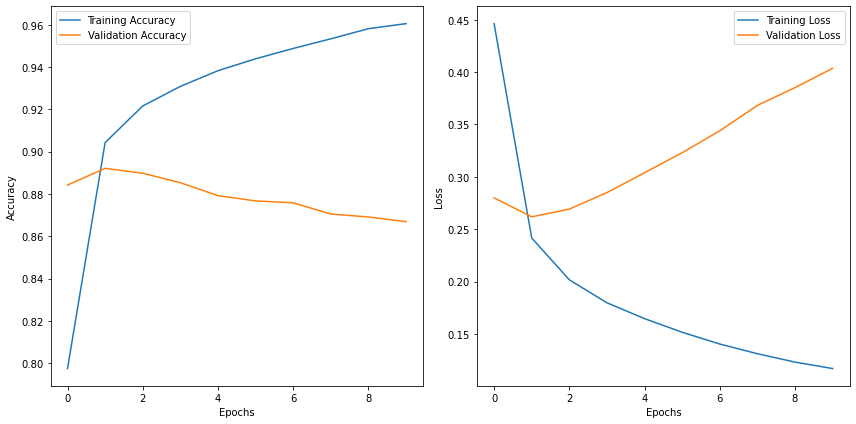

In [12]:

# Plot the accuracy and loss curves
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()